# Analyse de l'expérience

In [1]:
import matplotlib.pyplot as plt

import math
import numpy as np
import pandas as pd
import sys

### Fonction courbe d'expérience

In [2]:
def lvlXpOverlord(lvl):
    i = 1
    xp = []
    lv = []
    xpLvl = [100, 200, 500, 1000, 2000, 4000, 8000]
    currentXp = 0
    while(i <= lvl):
        if i < 15 : 
            currentXp += xpLvl[0]
            xp.append(currentXp)
        elif i < 30 : 
            currentXp += xpLvl[1]
            xp.append(currentXp)
        elif i < 45 : 
            currentXp += xpLvl[2]
            xp.append(currentXp)
        elif i < 60 : 
            currentXp += xpLvl[3]
            xp.append(currentXp)
        elif i < 75 : 
            currentXp += xpLvl[4]
            xp.append(currentXp)
        elif i < 90 : 
            currentXp += xpLvl[5]
            xp.append(currentXp)
        else: 
            currentXp += xpLvl[6]
            xp.append(currentXp)
        lv.append(i)
        i += 1
    return xp, lv

def lvlXpLinear(lvl):
    i = 1
    xp = []
    lv = []
    while(i <= lvl):
        xp.append(round(i * math.log(40) * 100))
        lv.append(i)
        i += 1
    return xp, lv


def lvlXpExp(lvl):
    i = 1
    xp = []
    lv = []
    while(i <= lvl):
        xp.append(round(i * 100 * math.exp(i / 100)))
        lv.append(i)
        i += 1
    return xp, lv

def lvlXpExp2(lvl):
    i = 1
    xp = []
    lv = []
    y = 100
    while(i <= lvl):
        xp.append(round(y + i + (i * 5 * 1.3) ))
        lv.append(i)
        y = y + i + (i * 5 * 1.3)
        i += 1
    return xp, lv



### Fonction analyse gain d'experience

In [3]:
def calculXpGainByLvDiffVsPlayer(xpGain, lvlMax, deadLvl):
    i = 1
    xp = []
    lv = []
    xpGain /= 1000
    while(i < lvlMax):
        xp.append(max(0, round(( xpGain  * (deadLvl + (i / 4) - i)) * math.exp(i / 100)) ))
        lv.append(i)
        i += 1
    return xp, lv


def gainStatByLvlPerRace(race):

    combattant = { "hp": [], "magie" : [], "attaque": [], "armure": [], "protection": [], "attribut": []}
    voleur = {"hp": [], "magie" : [], "attaque": [], "armure": [], "protection": [], "attribut": []}
    mage = {"hp": [], "magie" : [], "attaque": [], "armure": [], "protection": [], "attribut": []}
    ranger = {"hp": [], "magie" : [], "attaque": [], "armure": [], "protection": [], "attribut": []}
    i = 0

    allrace = { 
        "humain": { "hp": 1, "magie": 1, "attaque": 1, "armure": 1, "protection": 1 }, 
        "automate": { "hp": 1.05, "magie": 0.9, "attaque": 0.95, "armure": 1.05, "protection": 1.05 }, 
        "demon": { "hp": 1.3, "magie": 0.7, "attaque": 1.1, "armure": 1, "protection": 0.9 },
        "beastman": { "hp": 1.3, "magie": 0.7, "attaque": 1, "armure": 1, "protection": 1 },
        "elf": { "hp": 0.9, "magie": 1.1, "attaque": 1, "armure": 0.95, "protection": 1.05 },
        "nain": { "hp": 1.1, "magie": 1, "attaque": 0.8, "armure": 1.1, "protection": 1 },
        "liche": { "hp": 0.75, "magie": 1.2, "attaque": 1, "armure": 1.05, "protection": 1 },
        "nymphe": { "hp": 0.9, "magie": 1.2, "attaque": 0.9, "armure": 0.9, "protection": 1.1 },
        "vampire": { "hp": 0.95, "magie": 1.05, "attaque": 1.05, "armure": 0.95, "protection": 1 }
    }

    while(i < 15):
        for key,value in allrace.items():
            if key == race:

                combattant["hp"].append(round(60 + (5 * i) + ( (5 * i * value["hp"]) - (5 * i) )))
                combattant["magie"].append(round(20 + (1 * i) + ( (1 * i * value["magie"]) - (1 * i) )))
                combattant["attaque"].append(round(10 + (1 * i) + ( (1 * i * value["attaque"]) - (1 * i) )))
                combattant["armure"].append(round(2 + (0.5 * i) + ( (0.5 * i * value["armure"]) - (0.5 * i) ), 2))
                combattant["protection"].append(round(2 + (0.2 * i) + ( (0.2 * i * value["protection"]) - (0.2 * i) ), 2))
                
                combattant["attribut"].append(2 * i)

                voleur["hp"].append(round(50 + (2 * i) + ( (2 * i * value["hp"]) - (2 * i) )))
                voleur["magie"].append(round(30 + (5 * i) + ( (5 * i * value["magie"]) - (5 * i) )))
                voleur["attaque"].append(round(14 + (2 * i) + ( (2 * i * value["attaque"]) - (2 * i) )))
                voleur["armure"].append(round(1 + (0.2 * i) + ( (0.2 * i * value["armure"]) - (0.2 * i) ), 2))
                voleur["protection"].append(round(1 + (0 * i) + ( (0 * i * value["protection"]) - (0 * i) ), 2))
                voleur["attribut"].append(2 * i)

                mage["hp"].append(round(40 + (5 * i) + ( (5 * i * value["hp"]) - (5 * i) )))
                mage["magie"].append(round(40 + (10 * i) + ( (10 * i * value["magie"]) - (10 * i) )))
                mage["attaque"].append(round(14 + (1 * i) + ( (1 * i * value["attaque"]) - (1 * i) )))
                mage["armure"].append(round(0 + (0 * i) + ( (0 * i * value["armure"]) - (0 * i) ), 2))
                mage["protection"].append(round(0 + (0.5 * i) + ( (0.5 * i * value["protection"]) - (0.5 * i) ), 2))
                mage["attribut"].append(2 * i)

                ranger["hp"].append(round(40 + (5 * i) + ( (5 * i * value["hp"]) - (5 * i) )))
                ranger["magie"].append(round(40 + (5 * i) + ( (5 * i * value["magie"]) - (5 * i) )))
                ranger["attaque"].append(round(14 + (2 * i) + ( (2 * i * value["attaque"]) - (2 * i) )))
                ranger["armure"].append(round(0 + (0.1 * i) + ( (0.1 * i * value["armure"]) - (0.1 * i) ),1))
                ranger["protection"].append(round(0 + (0.1 * i) + ( (0.1 * i * value["protection"]) - (0.1 * i) ), 2))
                ranger["attribut"].append(2 * i)
                i += 1
    
    return combattant, voleur, mage, ranger


### Affichage des fonctions d'expérience

In [4]:
xpOverlord, lvlOverlord = lvlXpOverlord(100)
xpLinear, lvlLinear = lvlXpLinear(100)
xpExp, lvlExp = lvlXpExp(100)
xpExp2, lvlExp2 = lvlXpExp2(100)

i = 0
print("actuel \t\t\t linéaire \t\t exponentielle #1 \t exponentielle #2")
print("__________________________________________________________________________________________")
while i < 100:
    print("lvl : " + str(lvlOverlord[i]) + " = " + str(xpOverlord[i]) + "\t|\t" + "lvl : " + str(lvlLinear[i]) + " = " + str(xpLinear[i]) + "\t|\t" + "lvl : " + str(lvlExp[i]) + " = " + str(xpExp[i]) + "\t|\t" + "lvl : " + str(lvlExp2[i]) + " = " + str(xpExp2[i]))
    i+=1

actuel 			 linéaire 		 exponentielle #1 	 exponentielle #2
__________________________________________________________________________________________
lvl : 1 = 100	|	lvl : 1 = 369	|	lvl : 1 = 101	|	lvl : 1 = 108
lvl : 2 = 200	|	lvl : 2 = 738	|	lvl : 2 = 204	|	lvl : 2 = 122
lvl : 3 = 300	|	lvl : 3 = 1107	|	lvl : 3 = 309	|	lvl : 3 = 145
lvl : 4 = 400	|	lvl : 4 = 1476	|	lvl : 4 = 416	|	lvl : 4 = 175
lvl : 5 = 500	|	lvl : 5 = 1844	|	lvl : 5 = 526	|	lvl : 5 = 212
lvl : 6 = 600	|	lvl : 6 = 2213	|	lvl : 6 = 637	|	lvl : 6 = 258
lvl : 7 = 700	|	lvl : 7 = 2582	|	lvl : 7 = 751	|	lvl : 7 = 310
lvl : 8 = 800	|	lvl : 8 = 2951	|	lvl : 8 = 867	|	lvl : 8 = 370
lvl : 9 = 900	|	lvl : 9 = 3320	|	lvl : 9 = 985	|	lvl : 9 = 438
lvl : 10 = 1000	|	lvl : 10 = 3689	|	lvl : 10 = 1105	|	lvl : 10 = 512
lvl : 11 = 1100	|	lvl : 11 = 4058	|	lvl : 11 = 1228	|	lvl : 11 = 595
lvl : 12 = 1200	|	lvl : 12 = 4427	|	lvl : 12 = 1353	|	lvl : 12 = 685
lvl : 13 = 1300	|	lvl : 13 = 4796	|	lvl : 13 = 1480	|	lvl : 13 = 782
lvl : 14 

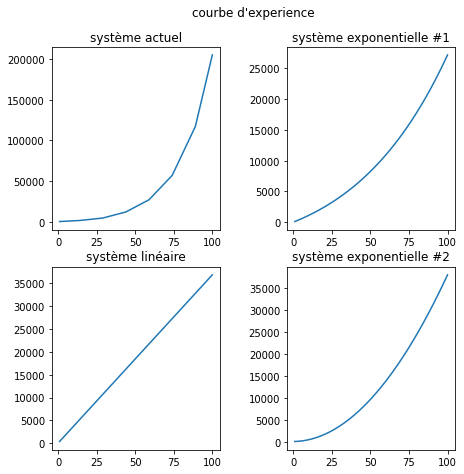

In [5]:
fig, axs = plt.subplots(2,2,figsize=(7,7))
fig.suptitle("courbe d'experience")
axs[0,0].set_title("système actuel")
axs[0,1].set_title("système exponentielle #1")
axs[1,0].set_title("système linéaire")
axs[1,1].set_title("système exponentielle #2")
axs[0,0].plot(lvlOverlord, xpOverlord)
axs[0,1].plot(lvlExp, xpExp)
axs[1,0].plot(lvlLinear, xpLinear)
axs[1,1].plot(lvlExp2, xpExp2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.2)

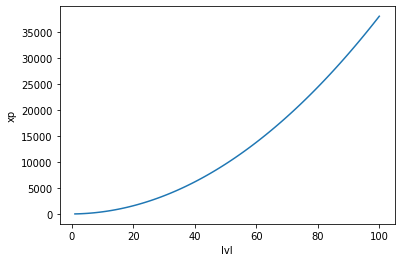

In [6]:
plt.plot(lvlExp2, xpExp2)
plt.xlabel('lvl')
plt.ylabel('xp')
plt.show()

### Affichage fonction d'analyse de gain 

In [7]:
def calculXpGainByLvDiff(xpGain, lvl, zoneLvl):
    i = 1
    xp = []
    lv = []
    nbr = 1
    while(i < lvl):
        xp.append(max(0, (round((xpGain + ( xpGain  * ((zoneLvl + 2) + (i / 15) - i)) * 1.5 * math.exp(i / 100)) ) /2 )  / nbr) )
        lv.append(i)
        i += 1
    return xp, lv

xpGain, lvlGain = calculXpGainByLvDiff(40,100, 8)
xpGain1, lvlGain1 = calculXpGainByLvDiff(15,100,100)
xpGain2, lvlGain2 = calculXpGainByLvDiffVsPlayer(37975,100,100)
i = 0
print("15 xp, lvlMob : 20 \t 30xp, lvlMob : 25 \t 100xp, lvlMob : 40")
print("_______________________________________________________________")
while i < 99:
    print("lvl : " + str(lvlGain[i]) + " = " + str(xpGain[i]) + "\t | \t" + "lvl : " + str(lvlGain1[i]) + " = " + str(xpGain1[i]) + "\t | \t" + "lvl : " + str(lvlGain2[i]) + " = " + str(xpGain2[i]) + "\t | \t"  )
    i +=1

15 xp, lvlMob : 20 	 30xp, lvlMob : 25 	 100xp, lvlMob : 40
_______________________________________________________________
lvl : 1 = 294.5	 | 	lvl : 1 = 1156.0	 | 	lvl : 1 = 3807	 | 	
lvl : 2 = 269.0	 | 	lvl : 2 = 1157.0	 | 	lvl : 2 = 3816	 | 	
lvl : 3 = 242.5	 | 	lvl : 3 = 1157.5	 | 	lvl : 3 = 3825	 | 	
lvl : 4 = 215.5	 | 	lvl : 4 = 1158.0	 | 	lvl : 4 = 3834	 | 	
lvl : 5 = 188.0	 | 	lvl : 5 = 1158.5	 | 	lvl : 5 = 3842	 | 	
lvl : 6 = 160.0	 | 	lvl : 6 = 1159.0	 | 	lvl : 6 = 3851	 | 	
lvl : 7 = 131.5	 | 	lvl : 7 = 1159.5	 | 	lvl : 7 = 3859	 | 	
lvl : 8 = 102.5	 | 	lvl : 8 = 1159.5	 | 	lvl : 8 = 3867	 | 	
lvl : 9 = 72.5	 | 	lvl : 9 = 1159.5	 | 	lvl : 9 = 3875	 | 	
lvl : 10 = 42.0	 | 	lvl : 10 = 1159.5	 | 	lvl : 10 = 3882	 | 	
lvl : 11 = 11.0	 | 	lvl : 11 = 1159.5	 | 	lvl : 11 = 3889	 | 	
lvl : 12 = 0	 | 	lvl : 12 = 1159.0	 | 	lvl : 12 = 3896	 | 	
lvl : 13 = 0	 | 	lvl : 13 = 1159.0	 | 	lvl : 13 = 3903	 | 	
lvl : 14 = 0	 | 	lvl : 14 = 1158.5	 | 	lvl : 14 = 3910	 | 	
lvl : 15 = 0	 | 	lvl :

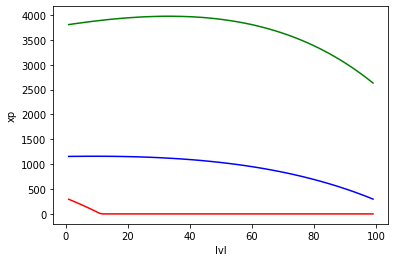

In [8]:
plt.plot(lvlGain, xpGain, "red", lvlGain1, xpGain1, "blue", lvlGain2, xpGain2, "green")
plt.xlabel('lvl')
plt.ylabel('xp')
plt.show()

### Calcul des stats gagné par lvl 

In [9]:
combattant, voleur, mage, ranger = gainStatByLvlPerRace("automate")

print(len(combattant))
print("combattant")
print("_____________________________________________________________________________________________________________")
i = 0
while i <= 14:
    print(
        "lvl : " + str(i+1) + " - hp = " + str(combattant["hp"][i]) + "\t | \t" + 
        "lvl : " + str(i+1) + " - mana = " + str(combattant["magie"][i]) + "\t | \t" + 
        "lvl : " +str(i+1) + " - atk = " + str(combattant["attaque"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - ar = " + str(combattant["armure"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - pr = " + str(combattant["protection"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - att = " + str(combattant["attribut"][i]))
    i +=1

i = 0
print("\nvoleur")
print("_____________________________________________________________________________________________________________")
while i <= 14:
    print(
        "lvl : " + str(i+1) + " - hp = " + str(voleur["hp"][i]) + "\t | \t" + 
        "lvl : " + str(i+1) + " - mana = " + str(voleur["magie"][i]) + "\t | \t" + 
        "lvl : " +str(i+1) + " - atk = " + str(voleur["attaque"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - ar = " + str(voleur["armure"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - pr = " + str(voleur["protection"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - att = " + str(voleur["attribut"][i]))
    i +=1

i = 0
print("\nmage")
print("_____________________________________________________________________________________________________________")
while i <= 14:
    print(
        "lvl : " + str(i+1) + " - hp = " + str(mage["hp"][i]) + "\t | \t" + 
        "lvl : " + str(i+1) + " - mana = " + str(mage["magie"][i]) + "\t | \t" + 
        "lvl : " +str(i+1) + " - atk = " + str(mage["attaque"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - ar = " + str(mage["armure"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - pr = " + str(mage["protection"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - att = " + str(mage["attribut"][i]))
    i +=1


i = 0
print("\ranger")
print("_____________________________________________________________________________________________________________")
while i <= 14:
    print(
        "lvl : " + str(i+1) + " - hp =" + str(ranger["hp"][i]) + "\t | \t" + 
        "lvl : " + str(i+1) + " - mana = " + str(ranger["magie"][i]) + "\t | \t" + 
        "lvl : " +str(i+1) + " - atk = " + str(ranger["attaque"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - ar = " + str(ranger["armure"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - pr = " + str(ranger["protection"][i]) + "\t | \t"  + 
        "lvl : " +str(i+1) + " - att = " + str(ranger["attribut"][i]))
    i +=1

6
combattant
_____________________________________________________________________________________________________________
lvl : 1 - hp = 60	 | 	lvl : 1 - mana = 20	 | 	lvl : 1 - atk = 10	 | 	lvl : 1 - ar = 2.0	 | 	lvl : 1 - pr = 2.0	 | 	lvl : 1 - att = 0
lvl : 2 - hp = 65	 | 	lvl : 2 - mana = 21	 | 	lvl : 2 - atk = 11	 | 	lvl : 2 - ar = 2.52	 | 	lvl : 2 - pr = 2.21	 | 	lvl : 2 - att = 2
lvl : 3 - hp = 70	 | 	lvl : 3 - mana = 22	 | 	lvl : 3 - atk = 12	 | 	lvl : 3 - ar = 3.05	 | 	lvl : 3 - pr = 2.42	 | 	lvl : 3 - att = 4
lvl : 4 - hp = 76	 | 	lvl : 4 - mana = 23	 | 	lvl : 4 - atk = 13	 | 	lvl : 4 - ar = 3.58	 | 	lvl : 4 - pr = 2.63	 | 	lvl : 4 - att = 6
lvl : 5 - hp = 81	 | 	lvl : 5 - mana = 24	 | 	lvl : 5 - atk = 14	 | 	lvl : 5 - ar = 4.1	 | 	lvl : 5 - pr = 2.84	 | 	lvl : 5 - att = 8
lvl : 6 - hp = 86	 | 	lvl : 6 - mana = 24	 | 	lvl : 6 - atk = 15	 | 	lvl : 6 - ar = 4.62	 | 	lvl : 6 - pr = 3.05	 | 	lvl : 6 - att = 10
lvl : 7 - hp = 92	 | 	lvl : 7 - mana = 25	 | 	lvl : 7 - atk = 16	 | 	

### Analyse de l'expérience gagné par message

In [10]:
def getNumberMessageForLevelUp(xpGain, xpNeed):

    msg = []
    i = 0
    while(i < 99):
        if xpGain[i] == 0:
            msg.append(0)
        else :
            msg.append(round(xpNeed[i] / xpGain[i]))
        i += 1
    return msg


def calculXpGainByLvlPerMessage(xpGain, char):
    i = 1
    xp = []
    lv = []
    while(i < 100):
        xp.append(5 + char * xpGain * (i - (i / 2)) * math.exp(i / 250))
        lv.append(i)
        i += 1
    return xp, lv


xp, lvl = calculXpGainByLvlPerMessage(0.001, 160)
xp2, lvl2 = calculXpGainByLvlPerMessage(0.001, 2000)
xpExp2, lvlExp2 = lvlXpExp2(100)
msg = getNumberMessageForLevelUp(xp, xpExp2)
msg2 = getNumberMessageForLevelUp(xp2, xpExp2)

print(xpExp2)
print("\n")
print(xp)
print("\n")
print(msg)
i = 0
while(i < 99):
    print("Lvl : " + str(i) + " message need : " + str(msg[i]))
    i += 1

[108, 122, 145, 175, 212, 258, 310, 370, 438, 512, 595, 685, 782, 888, 1000, 1120, 1248, 1382, 1525, 1675, 1832, 1998, 2170, 2350, 2538, 2732, 2935, 3145, 3362, 3588, 3820, 4060, 4308, 4562, 4825, 5095, 5372, 5658, 5950, 6250, 6558, 6872, 7195, 7525, 7862, 8208, 8560, 8920, 9288, 9662, 10045, 10435, 10832, 11238, 11650, 12070, 12498, 12932, 13375, 13825, 14282, 14748, 15220, 15700, 16188, 16682, 17185, 17695, 18212, 18738, 19270, 19810, 20358, 20912, 21475, 22045, 22622, 23208, 23800, 24400, 25008, 25622, 26245, 26875, 27512, 28158, 28810, 29470, 30138, 30812, 31495, 32185, 32882, 33588, 34300, 35020, 35748, 36482, 37225, 37975]


[5.080320640854187, 5.161285133680684, 5.242897349327858, 5.3251611793299505, 5.4080805360107025, 5.491659352587498, 5.575901583275998, 5.6608112033952755, 5.746392209473465, 5.832648619353911, 5.919584472301831, 6.007203829111492, 6.095510772213899, 6.184509405785005, 6.274203855854432, 6.364598270414726, 6.455696819531133, 6.5475036954518915, 6.640023112719

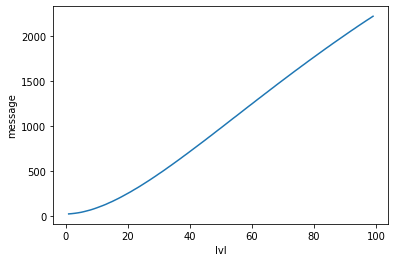

In [11]:
plt.plot(lvl, msg)
plt.xlabel('lvl')
plt.ylabel('message')
plt.show()